Últimas atualizações: 
*   14/02 - Giovanna
*   19/02 - Victor Hugo



# Importes e bibliotecas

In [1]:
!pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import folium
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_profiling

from pandas_profiling import ProfileReport

%matplotlib inline

# Setup do ambiente

In [3]:
lat_long_br_states = {"AC": [-8.77, -70.55], "AL": [-9.71, -35.73], "AP": [1.41, -51.77], "AM": [-3.07, -61.66], "BA": [-12.96, -38.51], "CE": [-3.71, -38.54], "DF": [-15.83, -47.86], "ES": [-19.19, -40.34], "GO": [-16.64, -49.31], "MA": [-2.55, -44.30], "MT": [-12.64, -55.42], "MS": [-20.51, -54.54], "MG": [-18.10, -44.38], "PA": [-5.53, -52.29], "PB": [-7.06, -35.55], "PR": [-24.89, -51.55], "PE": [-8.28, -35.07], "PI": [-8.28, -43.68], "RJ": [-22.84, -43.15], "RN": [-5.22, -36.52], "RS": [-30.01, -51.22], "RO": [-11.22, -62.80], "RR": [1.89, -61.22], "SC": [-27.33, -49.44], "SP": [-23.55, -46.64], "SE": [-10.90, -37.07], "TO": [-10.25, -48.25]}


# Análise Exploratória

In [4]:
df = pd.read_excel("./quarto-trimestre-2022.xlsx")

In [5]:
df.head()

,Número de Inscrição do CNPJ,Nome Fantasia,Tipo de Estabelecimento,Natureza Jurídica,Porte,Endereço Completo Receita Federal,UF,Município,Data de Abertura,CNAE(S) relacionados à atividade,...,Validade do Certificado,Categoria de Atuação,Atividades Obrigatórias,Atividades Opcionais,Segmentos Turísticos,Quantidade de Veículos,Quantidade de Embarcações,Embarcações Cruzeiro Marítimo,Embarcações Cruzeiro Fluvial/Barco-Hotel,Unnamed: 24
0,25.384.979/0001-70,DOCERRADO,Matriz,Empresário Individual,MICROEMPRESA,SQN 404 Bloco L APT 202 Brasília Asa Norte CEP...,DF,Brasília,2016-08-05,5590602|7911200|7912100|5590699|5611201|561120...,...,2024-07-18 00:00:00,Agência de Viagens e Turismo (Operadoras Turís...,Assessoramento planejamento e organização de ...,Assessoramento organização e execução de ativ...,Ecoturismo|Turismo de Esporte|Turismo de Aventura,0,0,0,0,NaN
1,09.196.186/0001-70,OLK TURISMO,Matriz,Sociedade Empresária Limitada,MICROEMPRESA,Quadra 1 SALA 04 Brasília Setor Norte (Brazlâ...,DF,Brasília,2007-11-13,7911200|4929903|7990200,...,2023-08-04 00:00:00,Agência de Viagens,Venda comissionada ou intermediação remunerada...,Assessoramento organização e execução de ativ...,Turismo de Saúde,0,0,0,0,NaN
2,72.590.763/0001-40,MATURIDADE VIP SERVICE,Matriz,Sociedade Empresária Limitada,MICROEMPRESA,de Mansões IAPI Brasília Guará II CEP: 710703...,DF,Brasília,1994-05-30,7911200|8230001|8230001|7990200|9001999,...,2024-11-21 00:00:00,Agência de Viagens,Venda comissionada ou intermediação remunerada...,Desembaraço de bagagens nas viagens e excursõ...,Turismo Cultural|Turismo de Negócios e Eventos...,0,0,0,0,NaN
3,33.453.408/0001-78,OBJETIVO TURISMO,Matriz,Sociedade Empresária Limitada,MICROEMPRESA,Brasília,DF,Brasília,1989-08-16,7911200,...,2024-10-24 00:00:00,Agência de Viagens,Venda comissionada ou intermediação remunerada...,Assessoramento organização e execução de ativ...,Turismo Cultural|Turismo de Negócios e Eventos...,0,0,0,0,NaN
4,05.400.829/0001-03,TRIPPER AGÊNCIA DE VIAGENS ...,Matriz,Sociedade Empresária Limitada,MICROEMPRESA,SAUS Quadra 3 SALA 416 Brasília Asa Sul CEP: 7...,DF,Brasília,2002-11-13,7911200|7990200,...,2023-12-13 00:00:00,Agência de Viagens,Venda comissionada ou intermediação remunerada...,Intermediação remunerada na reserva e contrata...,Turismo Cultural|Turismo de Negócios e Eventos...,0,0,0,0,NaN


Quais as colunas?

In [6]:
df.columns

Index(['Número de Inscrição do CNPJ', 'Nome Fantasia',
       'Tipo de Estabelecimento', 'Natureza Jurídica', 'Porte',
       'Endereço Completo Receita Federal', 'UF', 'Município',
       'Data de Abertura', 'CNAE(S) relacionados à atividade',
       'Possui Empregado?', 'Telefone Comercial', 'E-mail Comercial',
       'Website', 'Número do Certificado', 'Validade do Certificado',
       'Categoria de Atuação', 'Atividades Obrigatórias',
       'Atividades Opcionais', 'Segmentos Turísticos',
       'Quantidade de Veículos', 'Quantidade de Embarcações',
       'Embarcações Cruzeiro Marítimo',
       'Embarcações Cruzeiro Fluvial/Barco-Hotel', 'Unnamed: 24'],
      dtype='object')

Quantas linhas?

In [7]:
df.index

RangeIndex(start=0, stop=33986, step=1)

Quantos de cada estado?

In [8]:
df["UF"].value_counts()

SP    9785
RJ    4007
MG    2784
RS    2126
PR    1904
SC    1473
BA    1375
PE    1188
GO    1180
CE     967
DF     870
AL     760
AM     613
MA     601
ES     581
PB     569
PA     512
MS     474
RN     438
MT     437
SE     313
TO     268
RO     227
PI     205
AC     131
RR     109
AP      89
Name: UF, dtype: int64

Qual a natureza jurídica da maioria?

In [9]:
df["Natureza Jurídica"].value_counts()

Empresário Individual                                                       17158
Sociedade Empresária Limitada                                               11222
Empresário (Individual)                                                      2905
Empresa Individual de Responsabilidade Limitada (de Natureza Empresária)     2225
Serviço Social Autônomo                                                       193
Sociedade Simples Limitada                                                    131
Sociedade Anônima Fechada                                                      61
Cooperativa                                                                    31
Empresa Individual de Responsabilidade Limitada (de Natureza Simples)          28
Sociedade Anônima Aberta                                                       25
Sociedade Simples Pura                                                          6
Estabelecimento, no Brasil, de Sociedade Estrangeira                            1
Name: Natureza J

Qual a categoria de atuação da maioria?

In [10]:
df["Categoria de Atuação"].value_counts()

Agência de Viagens                                      24389
Agência de Viagens e Turismo (Operadoras Turísticas)     9596
673.580.128-87                                              1
Name: Categoria de Atuação, dtype: int64

Professor ensinou um jeito mais fácil... basta abrir o html abaixo:

In [11]:
#design_report = ProfileReport(df)
#design_report.to_file(output_file="report.html")

# Distribuição geográfica de empresas de turismo por estados brasileiros


In [12]:
states_count = df["UF"].value_counts()

map = folium.Map(width=700, height=700, location=[-15.788497,-47.879873], zoom_start=4)

for uf, count in states_count.items():
    if uf in lat_long_br_states.keys():
        folium.CircleMarker(location=lat_long_br_states[uf], radius=count/300, popup=f"{uf}: {count} empresas de turismo", fill=True, fill_opacity=0.7, color="#3186cc").add_to(map)

map

# Quais segmentos turísticos são mais populares em estados brasileiros 

In [17]:
temp = df.copy()

uf_segments = temp[["UF", "Segmentos Turísticos"]]

# global_total = uf_segments["UF"].count()

dummies = uf_segments["Segmentos Turísticos"].str.get_dummies(sep="|")
uf_segments = pd.concat([uf_segments, dummies], axis=1)

uf_segments = uf_segments.drop(["Segmentos Turísticos", "-"], axis=1)

for column in uf_segments.columns:
    if uf_segments[column][0] in [0, 1] and uf_segments[column].sum() <= 2:
        uf_segments = uf_segments.drop(column, axis=1)

grouped = uf_segments.groupby("UF").sum()

max_values = grouped.max(axis=1, numeric_only=True)
min_values = grouped.min(axis=1, numeric_only=True)

grouped = grouped.apply(lambda row: row.apply(lambda elem: -1 if elem != max_values[row.name] and elem != min_values[row.name] else elem), axis=1)

total_dict = uf_segments["UF"].value_counts().to_dict()

map = folium.Map(width=700, height=700, location=[-15.788497,-47.879873], zoom_start=4)

for state in grouped.index:
    values = sorted(grouped.loc[state], reverse=True)

    values_dict = grouped.loc[state].to_dict()
    max_name = max(values_dict, key=values_dict.get)
    
    folium.CircleMarker(location=lat_long_br_states[state], radius=(values[0]/total_dict[state])*30, popup=f"O segmento turístico mais popular no estado de {state} é {max_name} com {values[0]} empresas, de um total de {total_dict[state]} empresas", fill=True, fill_opacity=0.7, color="#3186cc").add_to(map)

map

# Quais segmentos turísticos são menos populares em estados brasileiros 

In [27]:
temp = df.copy()

uf_segments = temp[["UF", "Segmentos Turísticos"]]

dummies = uf_segments["Segmentos Turísticos"].str.get_dummies(sep="|")
uf_segments = pd.concat([uf_segments, dummies], axis=1)

uf_segments = uf_segments.drop(["Segmentos Turísticos", "-"], axis=1)

for column in uf_segments.columns:
    if uf_segments[column][0] in [0, 1] and uf_segments[column].sum() <= 2:
        uf_segments = uf_segments.drop(column, axis=1)

grouped = uf_segments.groupby("UF").sum()

max_values = grouped.max(axis=1, numeric_only=True)
min_values = grouped.min(axis=1, numeric_only=True)

grouped = grouped.apply(lambda row: row.apply(lambda elem: math.inf if elem != max_values[row.name] and elem != min_values[row.name] else elem), axis=1)

total_dict = uf_segments["UF"].value_counts().to_dict()

map = folium.Map(width=700, height=700, location=[-15.788497,-47.879873], zoom_start=4)

for state in grouped.index:
    values = sorted(grouped.loc[state], reverse=False)

    values_dict = grouped.loc[state].to_dict()
    min_name = min(values_dict, key=values_dict.get)
    
    folium.CircleMarker(location=lat_long_br_states[state], radius=((values[0]+1)**-1)*25, popup=f"O segmento turístico menos popular no estado de {state} é {min_name} com {int(values[0])} empresas, de um total de {total_dict[state]} empresas", fill=True, fill_opacity=0.7, color="#3186cc").add_to(map)

map

# Relação entre o porte da empresa e seu segmento turístico



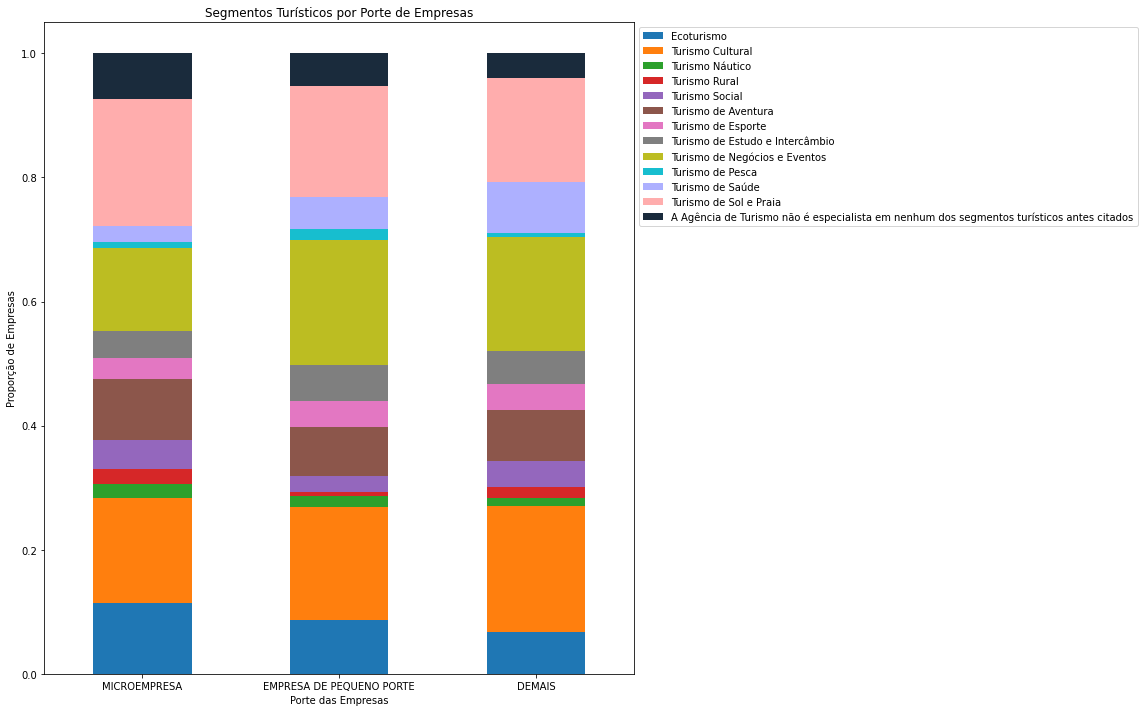

In [15]:
size_and_segments = df.copy()

size_and_segments = size_and_segments[["Porte", "Segmentos Turísticos"]]

dummies = size_and_segments["Segmentos Turísticos"].str.get_dummies(sep="|")
size_and_segments = pd.concat([size_and_segments, dummies], axis=1)

size_and_segments = size_and_segments.drop("Segmentos Turísticos", axis=1)

grouped = size_and_segments.groupby("Porte").sum()

grouped = grouped.copy()

grouped = grouped.loc[:, grouped.columns[grouped.sum() != 1]]

grouped = grouped.drop("-", axis=1)

grouped.head()

colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", 
          "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf", 
          "#adb0ff", "#ffadad", "#1a2b3c"]

segment_order = ["Ecoturismo", "Turismo Cultural", "Turismo Náutico", "Turismo Rural", 
                 "Turismo Social", "Turismo de Aventura", "Turismo de Esporte", 
                 "Turismo de Estudo e Intercâmbio", "Turismo de Negócios e Eventos", 
                 "Turismo de Pesca", "Turismo de Saúde", "Turismo de Sol e Praia",
                 "A Agência de Turismo não é especialista em nenhum dos segmentos turísticos antes citados"]

grouped_perc = grouped.div(grouped.sum(axis=1), axis=0)  
grouped_perc = grouped_perc.reindex(columns=segment_order) 

grouped_perc = grouped_perc.sort_values(by="Porte", ascending=False) 

fig, ax = plt.subplots(figsize=(16, 10))
grouped_perc.plot(kind="bar", stacked=True, ax=ax, color=colors)
ax.set_xticklabels(grouped_perc.index, rotation=0)
ax.set_xlabel("Porte das Empresas")
ax.set_ylabel("Proporção de Empresas")
ax.set_title("Segmentos Turísticos por Porte de Empresas")

handles = []
for i, _ in enumerate(segment_order):
    handles.append(plt.Rectangle((0,0),1,1,fc=colors[i], edgecolor="none"))
ax.legend(handles, segment_order, loc="upper left", bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

# Análise de frequência das atividades obrigatórias e opcionais por porte da empresa

In [16]:
# colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", 
#           "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf", 
#           "#adb0ff", "#ffadad", "#1a2b3c"]

# freqs = df.copy()

# freq_obrigatorias = freqs["Atividades Obrigatórias"].str.split("|")

# dummies_obrigatorias = freqs["Atividades Obrigatórias"].str.get_dummies(sep="|")

# freq_obrigatorias = pd.concat([freqs["Porte"], dummies_obrigatorias], axis=1)

# grouped_obrigatorias = freq_obrigatorias.groupby("Porte").sum()

# grouped_obrigatorias = grouped_obrigatorias.drop("Agência de Viagens", axis=1)

# grouped_perc_obrigatorias = grouped_obrigatorias.div(grouped_obrigatorias.sum(axis=1), axis=0)  
# grouped_perc_obrigatorias = grouped_perc_obrigatorias.reindex(columns=grouped_obrigatorias.columns) 
# grouped_perc_obrigatorias = grouped_perc_obrigatorias.sort_values(by="Porte", ascending=False) 


# fig, ax = plt.subplots(figsize=(30, 10))
# grouped_perc_obrigatorias.plot(kind="bar", stacked=True, ax=ax, color=colors)
# ax.set_xticklabels(grouped_perc_obrigatorias.index, rotation=0)
# ax.set_xlabel("Porte das Empresas")
# ax.set_ylabel("Proporção")
# ax.set_title("Frequência das atividades obrigatórias por porte da empresa")

# handles = []
# for i, _ in enumerate(grouped_perc_obrigatorias.columns):
#     handles.append(plt.Rectangle((0,0),1,1,fc=colors[i], edgecolor="none"))
# ax.legend(handles, grouped_perc_obrigatorias.columns, loc="upper left", bbox_to_anchor=(1, 1))

# plt.tight_layout()
# plt.show()




# freq_opcionais = freqs["Atividades Opcionais"].str.split("|")
# dummies_opcionais = freqs["Atividades Opcionais"].str.get_dummies(sep="|")
# freq_opcionais = pd.concat([freqs["Porte"], dummies_opcionais], axis=1)

# grouped_opcionais = freq_opcionais.groupby("Porte").sum()

# grouped_opcionais = grouped_opcionais.drop("-", axis=1)

# grouped_perc_opcionais = grouped_opcionais.div(grouped_opcionais.sum(axis=1), axis=0)  
# grouped_perc_opcionais = grouped_perc_opcionais.reindex(columns=grouped_opcionais.columns) 
# grouped_perc_opcionais = grouped_perc_opcionais.sort_values(by="Porte", ascending=False) 



# fig, ax = plt.subplots(figsize=(30, 10))
# grouped_perc_opcionais.plot(kind="bar", stacked=True, ax=ax, color=colors)
# ax.set_xticklabels(grouped_perc_opcionais.index, rotation=0)
# ax.set_xlabel("Porte das Empresas")
# ax.set_ylabel("Proporção")
# ax.set_title("Frequência das atividades opcionais por porte da empresa")

# handles = []
# for i, _ in enumerate(grouped_perc_opcionais.columns):
#     handles.append(plt.Rectangle((0,0),1,1,fc=colors[i], edgecolor="none"))
# ax.legend(handles, grouped_perc_opcionais.columns, loc="upper left", bbox_to_anchor=(1, 1))

# plt.tight_layout()
# plt.show()